In [2]:
import keras

In [1]:
import numpy as np
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import random_normal
from matplotlib import pyplot as plt
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D
from keras.layers.convolutional import AveragePooling2D, Conv2D
from keras.utils import to_categorical

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

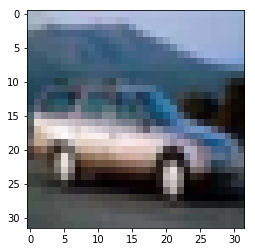

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4])

In [5]:
batch_size = 128
epochs = 50
num_classes = 10
s = 2

In [6]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255 
x_test /= 255

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(32,(3,3),input_shape = x_train[0].shape, activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(strides = (s,s)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(strides = (s,s)))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))

model.add(Dense(num_classes, activation = 'softmax'))

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(), metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                                batch_size = batch_size,
                                epochs = epochs,
                                verbose = 1,
                                validation_data = (x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 123s 2ms/step - loss: 2.2429 - acc: 0.1612 - val_loss: 2.1549 - val_acc: 0.2363
Epoch 2/50
50000/50000 [==============================] - 126s 3ms/step - loss: 1.9895 - acc: 0.2775 - val_loss: 1.9311 - val_acc: 0.3378
Epoch 3/50
50000/50000 [==============================] - 114s 2ms/step - loss: 1.8403 - acc: 0.3404 - val_loss: 1.8110 - val_acc: 0.3740
Epoch 4/50
50000/50000 [==============================] - 126s 3ms/step - loss: 1.7171 - acc: 0.3847 - val_loss: 1.7003 - val_acc: 0.4203
Epoch 5/50
50000/50000 [==============================] - 111s 2ms/step - loss: 1.6207 - acc: 0.4161 - val_loss: 1.7471 - val_acc: 0.3988
Epoch 6/50
39936/50000 [======================>.......] - ETA: 2:56 - loss: 1.5561 - acc: 0.4375

In [ ]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])